### Introdução à Previsão
Nas aulas anteriores ajustamos vários modelos de suavização aos dados de séries temporais. O objetivo deste procedimento é prever o que acontecerá a seguir. Assim, podemos estimar os valores do próximo mês, ou dos próximos seis meses.

Veremos agora como utilizar nossos modelos para realizar previsões. Para tanto, o primeiro passo é dividir nossos dados em dois conjuntos: treino e teste. Assim, podemos avaliar a eficiência do modelo treinado na previsão de dados de teste conhecidos.

Nesta aula iremos comparar um modelo de previsão Holt-Winters com dados conhecidos.

### Previsão com o método de Holt-Winters
No exemplo a seguir usaremos o dataset *airline_passengers*. Vamos divir o dataset em 108 registro de treino e 36 registro de teste. Em seguida, faremos a avaliação da eficiência do nosso modelo.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

In [ ]:
dados_treino = df.iloc[:108]
dados_test = df.iloc[108:]

### Divisão Treino / Teste
Usaremos cerca de 75% do nosso dataset para treino e 25% para teste.

In [ ]:
dados_treino = df.iloc[:108] 
dados_teste = df.iloc[108:]

### Ajustando o modelo
Vamos ajustar o modelo usando o método de Holt-Winters. Como vimos na aula passada, para o dataset *airline_passengers* é melhor usar trend='mul' e seasonal='mul'.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_ajustado = ExponentialSmoothing(dados_treino['Thousands of Passengers'], trend="mul" , seasonal='mul' , seasonal_periods=12).fit()


### Comparando o modelo com o cojunto de teste
Utlizando o nosso modelo ajustado, vamos agora prever os valores dos próximos 36 meses e comparar com o conjunto de teste correspondente.

In [ ]:
previsoes_teste = modelo_ajustado.forecast(36).rename("previsão HW")

In [ ]:
previsoes_teste

In [ ]:
dados_treino['Thousands of Passengers'].plot(legend=True , label="Treino")
dados_teste['Thousands of Passengers'].plot(legend=True , label="Treino")

In [ ]:
dados_treino['Thousands of Passengers'].plot(legend=True , label="Treino")


dados_teste['Thousands of Passengers'].plot(legend=True , label="Treino" , figsize=(12,5))
previsoes_teste.plot(legend=True , label="prev")

### Métricas de Avaliação

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_absolute_error(dados_teste , previsoes_teste)

In [ ]:
mean_squared_error(dados_teste , previsoes_teste)

### Previsões Futuras

In [ ]:
modelo_final = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul' , seasonal='mul' , seasonal_periods=12).fit()
previsao = modelo_final.forecast(48)

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
previsao.plot()


## Exercício 1
Utilize o método de Holt-Winters para obter um modelo ajustado capaz de realizar a previsão de contratações na indústria hoteleira da Califórnia. \
A) Divida o dataset: 3/4 para treino e 1/4 para teste. \
B) Plote um gráfico contendo os dados de treino e os dados de teste. \
C) Plote um gráfico contendo os dados de treino, os dados de teste e a previsão obtida. \
D) Avalie a qualidade da previsão obtida. \
E) Crie um modelo de previsão para os próximos 24 meses e plote o gráfico resultante.

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('industria_hoteleira.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
df.head()
len(df)

228

A) Divida o dataset: 3/4 para treino e 1/4 para teste. 

In [29]:
trainingData = df.iloc[:round(3*(len(df)/4))]
testingData= df.iloc[round(3*(len(df)/4)):]

print(round(3*(len(df)/4)))

171


B) Plote um gráfico contendo os dados de treino e os dados de teste.

<Axes: xlabel='Date'>

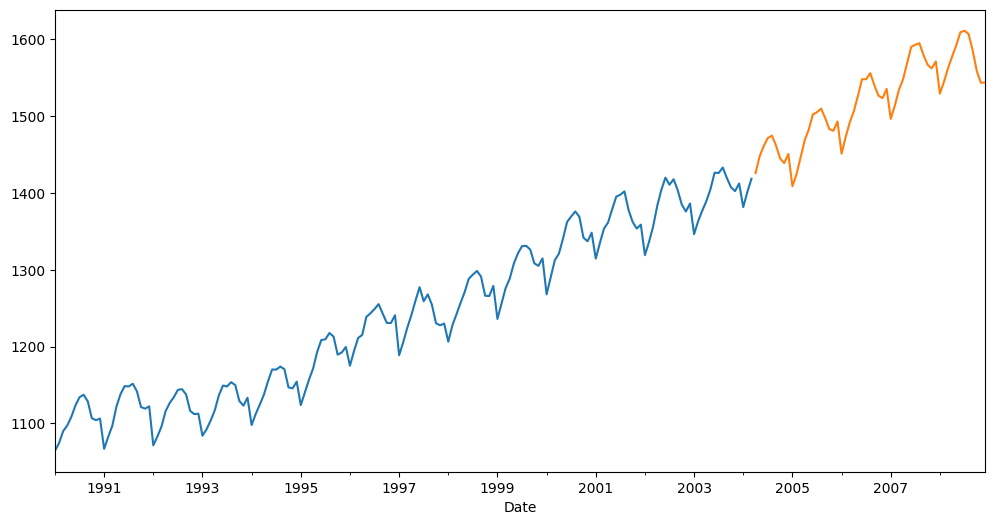

In [18]:
trainingData['Employees'].plot(figsize=(12,6))
testingData['Employees'].plot()

C) Plote um gráfico contendo os dados de treino, os dados de teste e a previsão obtida. 

/home/aluno/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Date'>

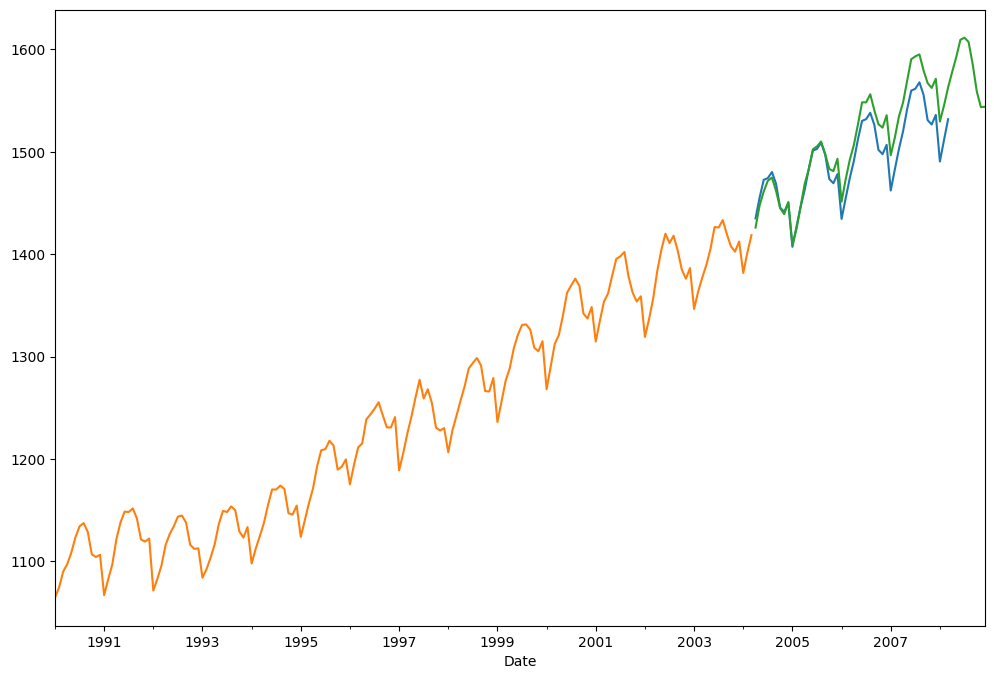

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_ajustado = ExponentialSmoothing(trainingData['Employees'], trend="mul" , seasonal='mul' , seasonal_periods=12).fit()
previsao = modelo_ajustado.forecast(48)
previsao.plot(figsize=(12,8))
trainingData["Employees"].plot()
testingData["Employees"].plot()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

D) Avalie a qualidade da previsão obtida.

In [28]:
mean_squared_error(testingData , previsao)

ValueError: Found input variables with inconsistent numbers of samples: [57, 24]

In [23]:
mean_absolute_error(testingData , previsao)

ValueError: Found input variables with inconsistent numbers of samples: [57, 48]

E) Crie um modelo de previsão para os próximos 24 meses e plote o gráfico resultante.

/home/aluno/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: >

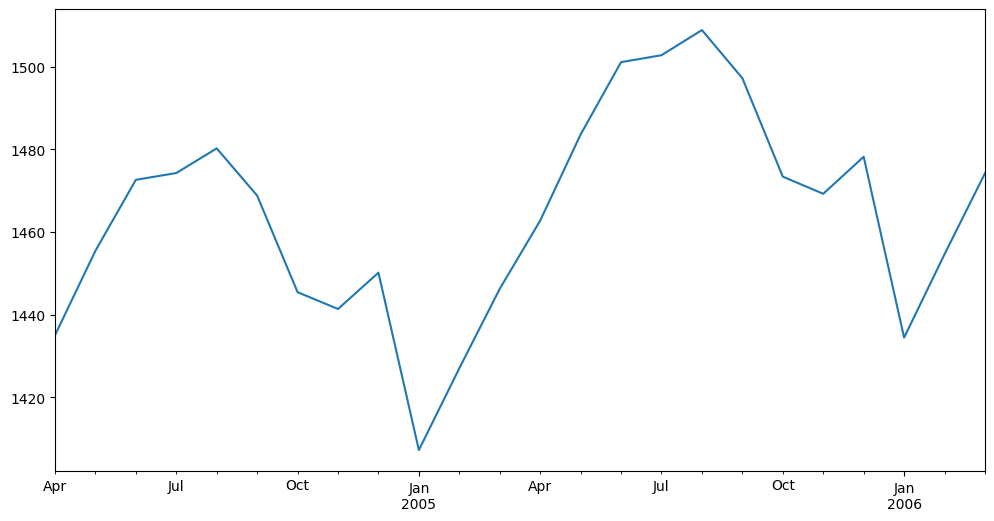

In [26]:
modelo_ajustado = ExponentialSmoothing(trainingData['Employees'], trend="mul" , seasonal='mul' , seasonal_periods=12).fit()
previsao = modelo_ajustado.forecast(24)
previsao.plot(figsize=(12,6))